# Exploratory Analysis of Social Media Dataset

Importation of Python libraries and the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

data = pd.read_csv("/content/Instagram data.csv", encoding='latin-1')

Now let’s have a look at the first five rows of the data:

In [ ]:
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

Now let’s have a look at all the columns the dataset contains:

In [ ]:
print(data.columns)

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')


Now let’s have a look at the column info:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Next, we look at the descriptive statistics of the data:

In [ ]:
print(data.describe())

        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

Now, before moving forward, always have a look if your data contains any missing values or not:

In [ ]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

Luckily, this dataset doesn’t have any missing values.

# **Exploratory Analysis**

1. We will explore the distribution of the instagram account Impressions:

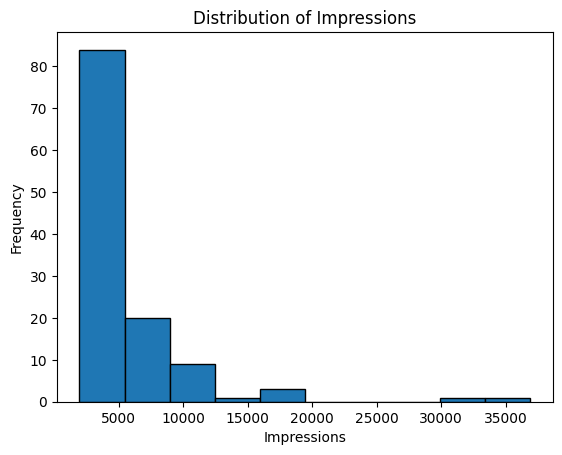

In [ ]:
# Create a histogram with Matplotlib
plt.hist(data['Impressions'], bins=10, edgecolor='black')
plt.title('Distribution of Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')

# Show the plot
plt.show()

2. Now let’s have a look at the number of impressions on each post over time:

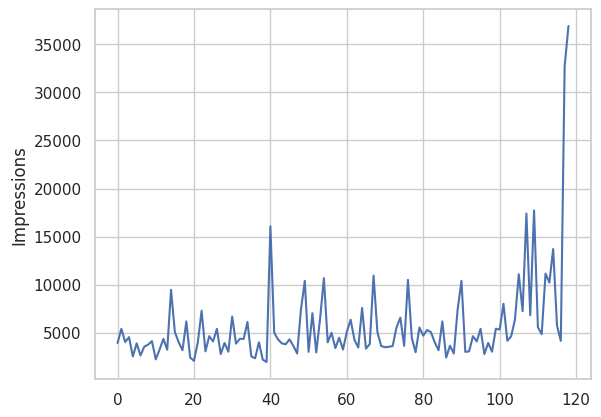

In [ ]:
x = data.index
y = data['Impressions']

# Plot the line graph using Seaborn
sns.lineplot(x=x, y=y, data=data)

# Show the plot
plt.show()

Now let’s have a look at all the metrics like Likes, Saves, and Follows from each post over time:

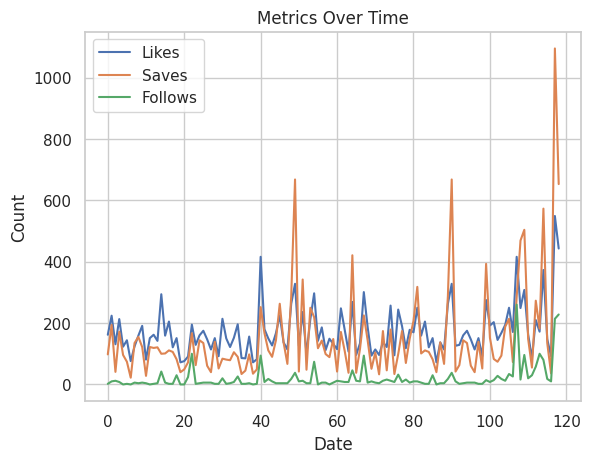

In [ ]:
sns.lineplot(x=data.index, y=data['Likes'], label='Likes')
sns.lineplot(x=data.index, y=data['Saves'], label='Saves')
sns.lineplot(x=data.index, y=data['Follows'], label='Follows')

plt.title('Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

plt.show()

Now let’s have a look at the distribution of reach from different sources:

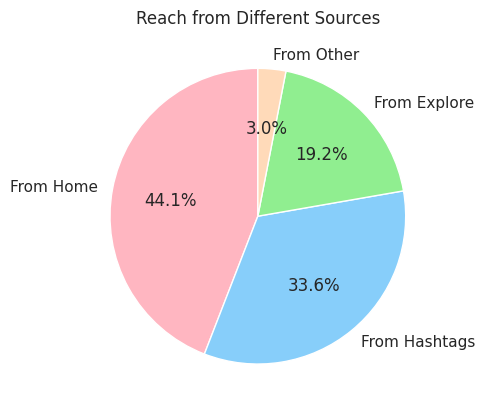

In [ ]:
reach_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
reach_counts = [data[source].sum() for source in reach_sources]
colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

# Create a pie chart using Matplotlib
plt.pie(reach_counts, labels=reach_sources, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Reach from Different Sources')

# Show the plot
plt.show()

Now let’s have a look at the distribution of engagement sources:

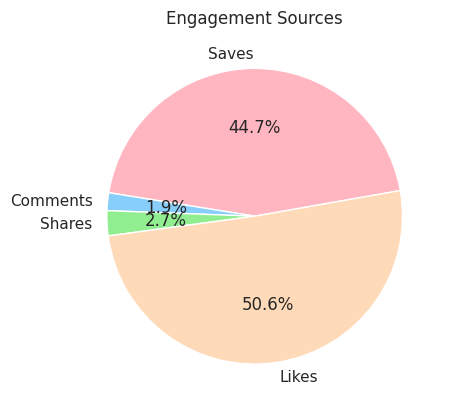

In [ ]:
engagement_metrics = ['Saves', 'Comments', 'Shares', 'Likes']
engagement_counts = [data[metric].sum() for metric in engagement_metrics]
colors = ['#FFB6C1', '#87CEFA', '#90EE90', '#FFDAB9']

# Create a pie chart using Matplotlib with Seaborn style
plt.pie(engagement_counts, labels=engagement_metrics, autopct='%1.1f%%', colors=colors, startangle=10)
plt.title('Engagement Sources')

# Show the plot
plt.show()

Now let’s have a look at the relationship between the number of profile visits and follows:

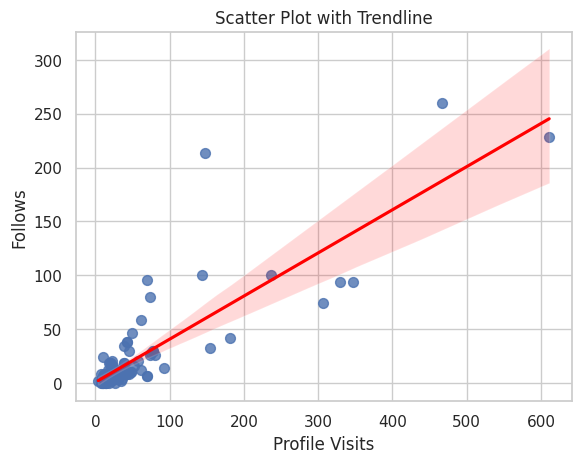

In [ ]:
# Create a scatter plot with a trendline using Seaborn
sns.regplot(x='Profile Visits', y='Follows', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Profile Visits')
plt.ylabel('Follows')
plt.title('Scatter Plot with Trendline')

# Show the plot
plt.show()

Now let’s have a look at the correlation between all the features:

<ipython-input-129-998433e15d06>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


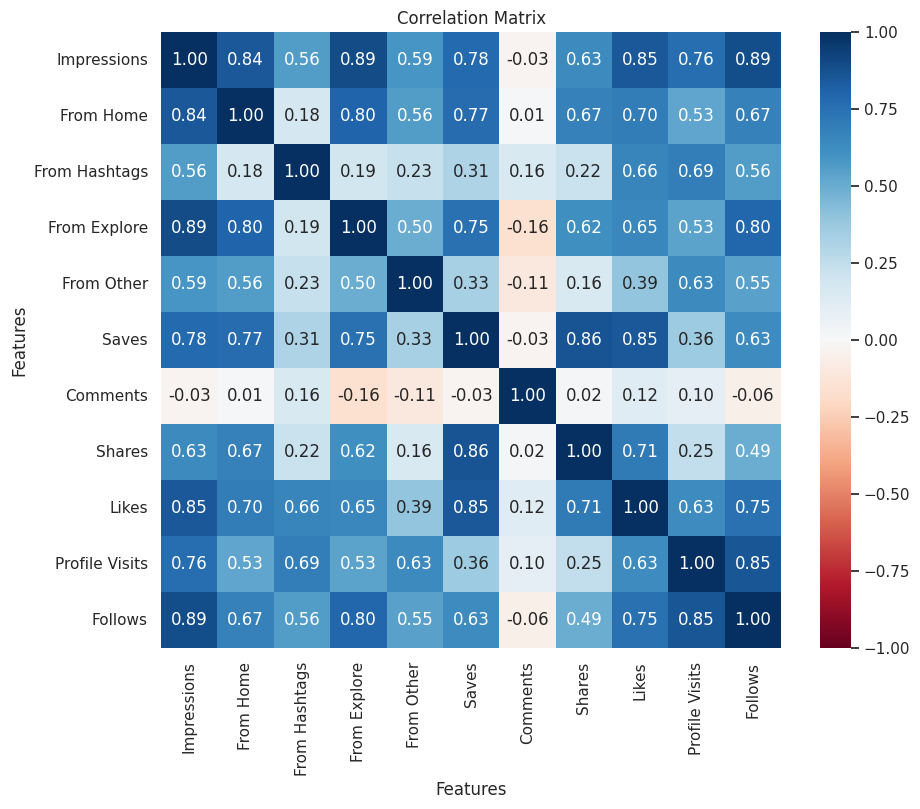

In [ ]:
corr_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, fmt=".2f", vmin=-1, vmax=1)

# Set plot title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()